# Opdracht 17

Train a decision tree to predict the species of a penguin based on their characteristics.

- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to schoose which columns you want to use as feature variables and you are also free to choose the maxx_depth of the tree. Note: Some machine learning algorithms can not handle missing values. You owill either need to 
    - Replace missing values (.fillna())
    - Remove rows with missing data (.dropna())
- Use your decision tree model to make predictions for both the train and test set
- Calculate the RMSE for both the train set and test set predictions
- Is the RMSE different? DId you expect this difference
- Use the plot_tree_regression function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree

In [1]:
import pandas as pd
import seaborn as sns

import graphviz

from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [2]:
pg = sns.load_dataset("penguins")
pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
pg_train, pg_test = train_test_split(pg, test_size=0.3)

pg_train = pg_train.dropna()
pg_test = pg_test.dropna()

In [4]:
features=['bill_length_mm', 'flipper_length_mm']
dt = DecisionTreeRegressor(max_depth = 7)
dt.fit(pg_train[features], pg_train['body_mass_g'])

DecisionTreeRegressor(max_depth=7)

In [5]:
predictions_train = dt.predict(pg_train[features])
predictions_test = dt.predict(pg_test[features])

In [6]:
def plot_tree_regression(model, features):
    dot_data = tree.export_graphviz(model, out_file=None,
                                   feature_names = features,
                                   filled=True, rounded = True,
                                   special_characters = True)
    graph = graphviz.Source(dot_data)
    graph.render("decision_tree")
    return graph

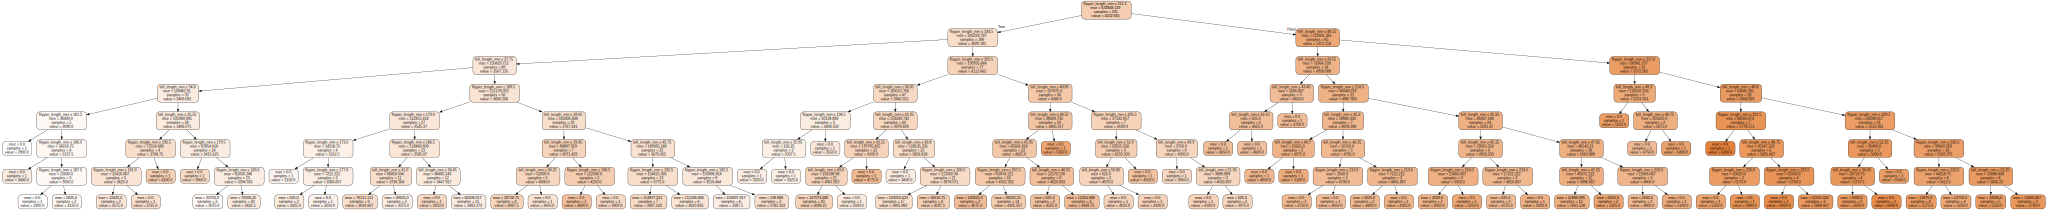

In [7]:
plot_tree_regression(dt, features)

In [8]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exeption("The amount of predictions did not equal the amount of actuals")

    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [9]:
rmseTrain = calculate_rmse(predictions_train, pg_train['body_mass_g'])
rmseTest = calculate_rmse(predictions_test, pg_test['body_mass_g'])

print("RMSE of the train set: " + str(rmseTrain))
print("RMSE of the test set: " + str(rmseTest))

RMSE of the train set: 230.41318444145622
RMSE of the test set: 486.21431950265696


Er is hier te zien dat de standaardafwijkingen iets meer dan 200 uit elkaar zitten. 
In het geval van het gewicht van de penguins in grammen, is dit niet enorm groot.